In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd

#Load the iris dataset
iris = load_iris()

#Vanilla code


In [11]:
#This function calculate the mean for every feature in the dataset
def mean(data):
    means = []
    num_rows = len(data)
    num_cols = len(data[0])

    for j in range(num_cols):
        col_sum = sum(data[i][j] for i in range(num_rows))
        means.append(col_sum / num_rows)

    return means

feature_means = mean(iris.data)

for i, feature_name in enumerate(iris.feature_names):
    print(f"The {feature_name} mean is: {feature_means[i]}")

The sepal length (cm) mean is: 5.843333333333335
The sepal width (cm) mean is: 3.057333333333334
The petal length (cm) mean is: 3.7580000000000027
The petal width (cm) mean is: 1.199333333333334


In [12]:
#This function calculate the standard deviation of a list of values
def standard_deviation(values):
    mean = sum(values) / len(values)
    variance = sum((x - mean) ** 2 for x in values) / len(values)
    return variance ** 0.5

#This function calculate the covariance between two lists
def covariance(X, Y):
    mean_X = sum(X) / len(X)
    mean_Y = sum(Y) / len(Y)
    cov = sum((X[i] - mean_X) * (Y[i] - mean_Y) for i in range(len(X))) / len(X)
    return cov

#This function calculate the correlation matrix
def correlation_matrix(data):
    num_cols = len(data[0])
    num_rows = len(data)
    corr_matrix = [[0] * num_cols for _ in range(num_cols)]

    columns = [[data[i][j] for i in range(num_rows)] for j in range(num_cols)]
    stddevs = [standard_deviation(col) for col in columns]

    for i in range(num_cols):
        for j in range(num_cols):
            cov = covariance(columns[i], columns[j])
            corr_matrix[i][j] = cov / (stddevs[i] * stddevs[j])

    return corr_matrix

#This function calculate the variance and covariance matrix
def variance_covariance_matrix(data):
    num_cols = len(data[0])
    num_rows = len(data)
    cov_matrix = [[0] * num_cols for _ in range(num_cols)]

    columns = [[data[i][j] for i in range(num_rows)] for j in range(num_cols)]

    for i in range(num_cols):
        for j in range(num_cols):
            cov_matrix[i][j] = covariance(columns[i], columns[j])

    return cov_matrix

correlation_matrix = correlation_matrix(iris.data)
covariance_matrix = variance_covariance_matrix(iris.data)

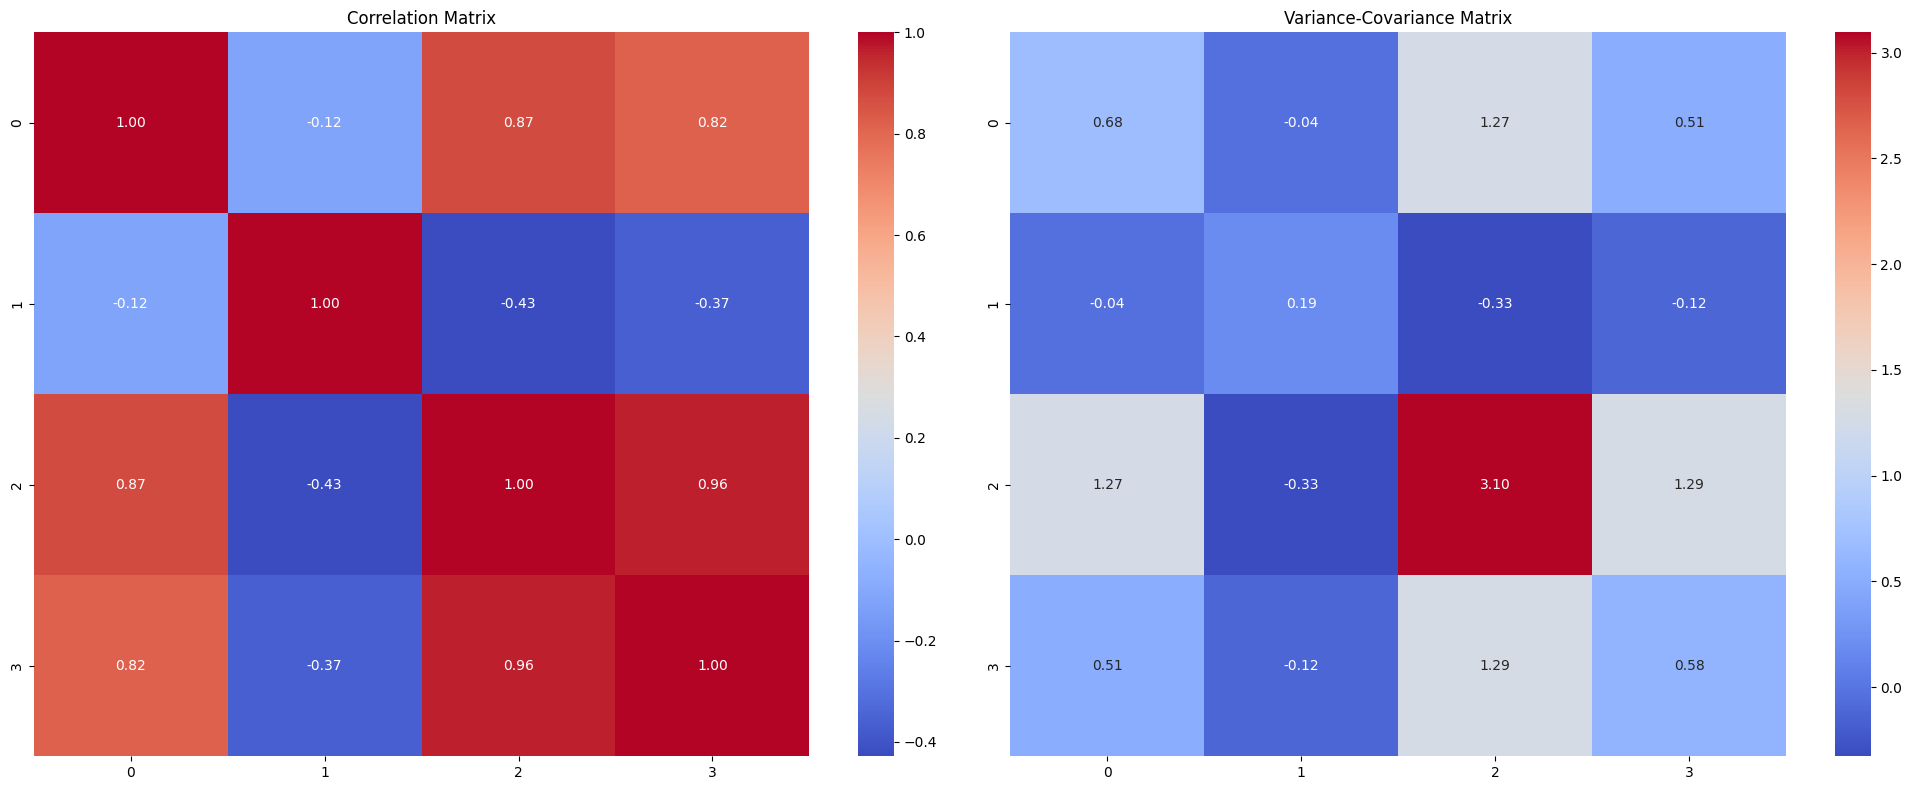

In [13]:
#Plot correlation matrix and variance-covariance matrix using seaborn heatmap
plt.figure(figsize=(20, 8))

#Correlation Matrix
plt.subplot(1, 2, 1)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')

#Variance-Covariance Matrix
plt.subplot(1, 2, 2)
sns.heatmap(covariance_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Variance-Covariance Matrix')

plt.tight_layout()
plt.show()

#Pandas code

In [14]:
iris_data = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])

#Calculate mean
feature_means = iris_data.mean()

#Calculate the correlation matrix
correlation_matrix = iris_data.corr()

#Calculate the variance-covariance matrix
covariance_matrix = iris_data.cov()

In [15]:
#Print the feature means
print("Feature-wise Means:\n", feature_means)

Feature-wise Means:
 sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64


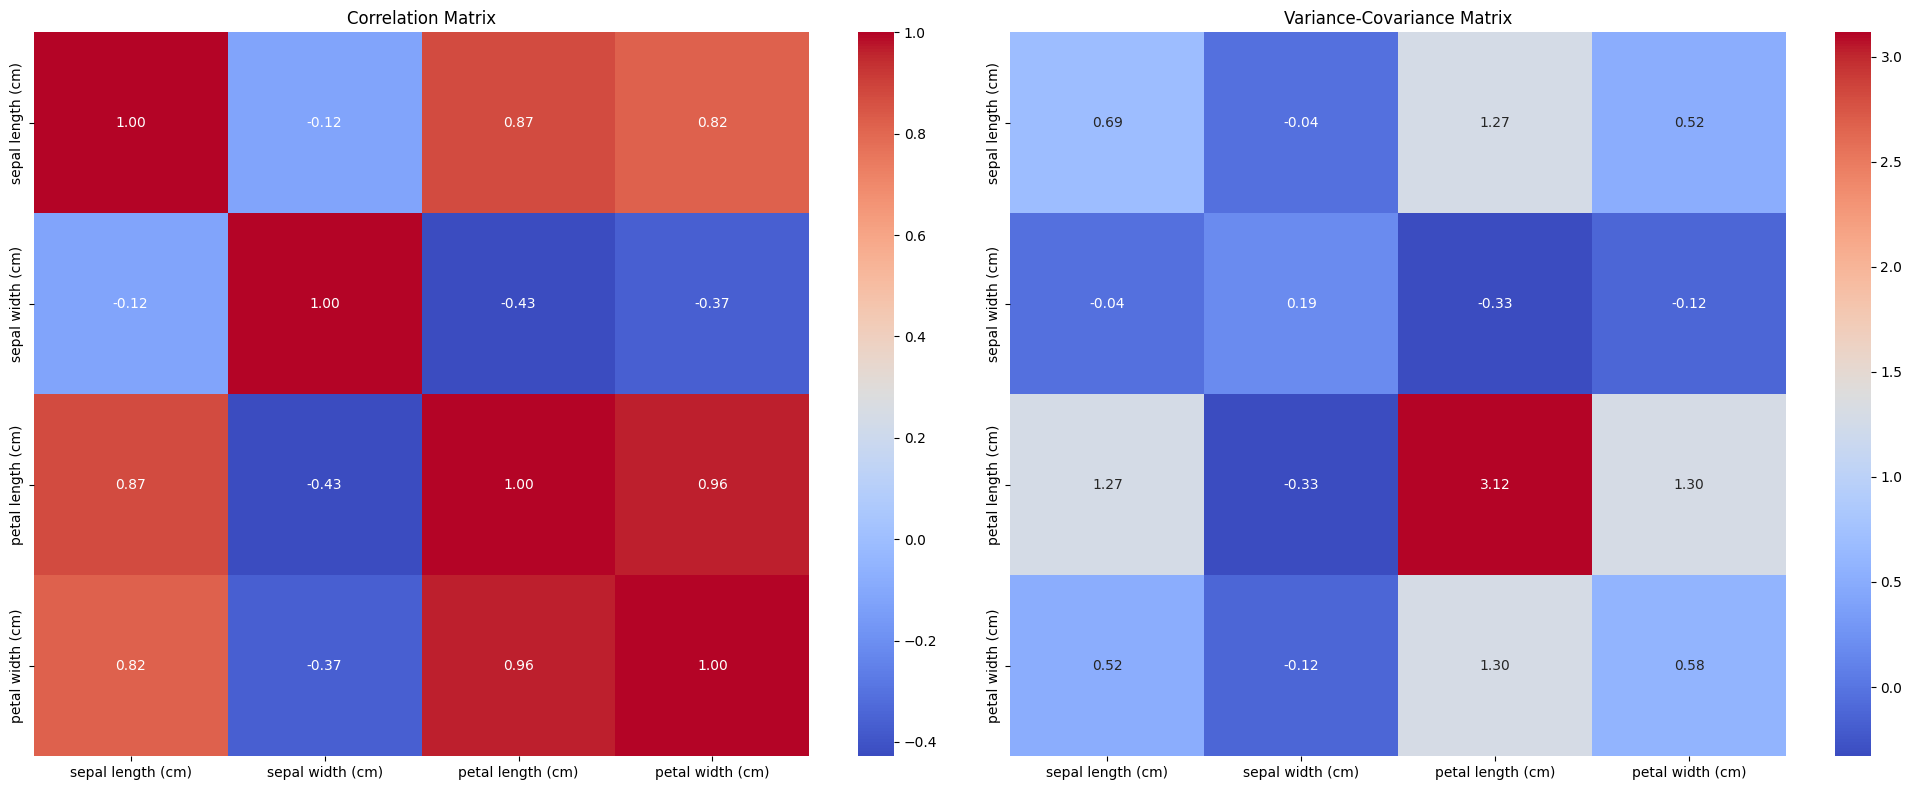

In [16]:
#Plot correlation matrix and variance-covariance matrix using seaborn heatmap
plt.figure(figsize=(20, 8))

#Correlation Matrix
plt.subplot(1, 2, 1)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')

#Variance-Covariance Matrix
plt.subplot(1, 2, 2)
sns.heatmap(covariance_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Variance-Covariance Matrix')

plt.tight_layout()
plt.show()